<a href="https://colab.research.google.com/github/GodfatherM/Assignments-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
"Title:Training a Convolutional Neural Network Model with MNIST Dataset"
"Name:Alejandro de Jesus Guerrero Maynes"
"ID Number:2109308"
"Class Time:N4-N6"

'Class Time:N4-N6'

In [8]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [9]:
# Loading the MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Print shape to verify dataset dimensions
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [10]:
# Reshaping data to add channel dimension (required for CNNs)
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

# Normalizing pixel values
train_data = train_data / 255.0
test_data = test_data / 255.0

# One-hot encoding labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Verifying the preprocessing steps
print(f'New train data shape: {train_data.shape}')
print(f'New test data shape: {test_data.shape}')


New train data shape: (60000, 28, 28, 1)
New test data shape: (10000, 28, 28, 1)


In [11]:
# Defining the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9055 - loss: 0.3113 - val_accuracy: 0.9793 - val_loss: 0.0744
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9836 - loss: 0.0522 - val_accuracy: 0.9865 - val_loss: 0.0478
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9877 - val_loss: 0.0466
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9884 - val_loss: 0.0421
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9900 - val_loss: 0.0406
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9886 - val_loss: 0.0477
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9955 - loss: 0.0122 - val_accuracy: 0.9892 - val_loss: 0.0461
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9977 -

In [12]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 - 3s - 8ms/step - accuracy: 0.9873 - loss: 0.0514
Test Accuracy: 0.9873


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


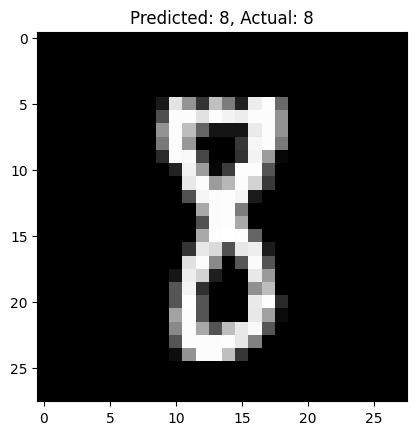

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


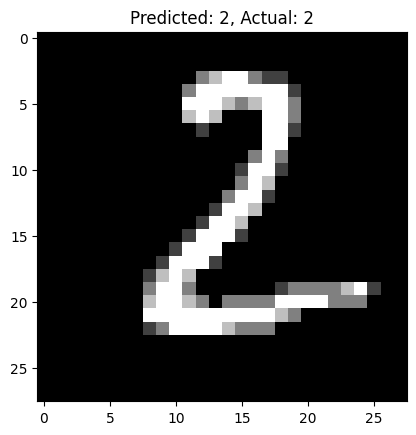

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


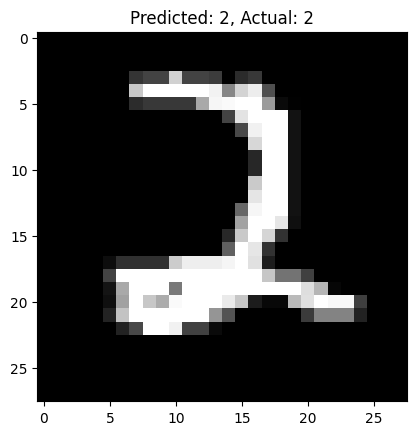

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


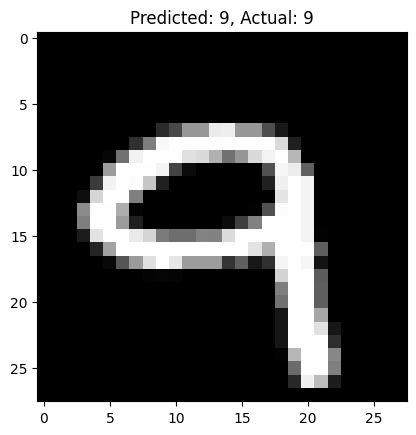

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


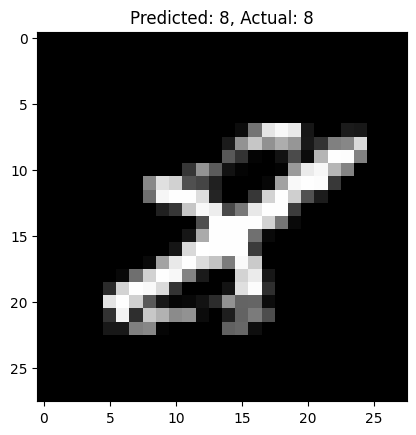

In [13]:
# Making predictions on 5 random samples from the test set
for i in range(5):
    idx = np.random.randint(0, test_data.shape[0])
    image = test_data[idx]
    actual_label = np.argmax(test_labels[idx])
    prediction = np.argmax(model.predict(image.reshape(1, 28, 28, 1)), axis=1)[0]

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {prediction}, Actual: {actual_label}')
    plt.show()


### Comparison with Feedforward Neural Network

1. **How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?**

   I used 10 epochs, which is consistent with the feedforward network for a fair comparison.

2. **Did you get a better performance on this assignment or on assignment 6? Why?**

   The Convolutional Neural Network (CNN) performed better because it is specifically designed for image data. CNNs use convolutional layers to detect spatial patterns (such as edges, textures, and shapes) that feedforward networks cannot process effectively. As a result, the CNN achieved higher accuracy and generalization on the test dataset compared to the feedforward network.
